# Audio Pre-processing using Librosa

In [1]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

### Visualize the audio

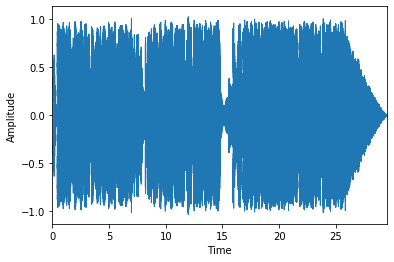

In [2]:
filename = "test.wav"

signal, sr = librosa.load(filename, sr = 16000) # Sample rate = 22kHz
librosa.display.waveplot(signal, sr = sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

### Fast Fourier Transform (FFT)

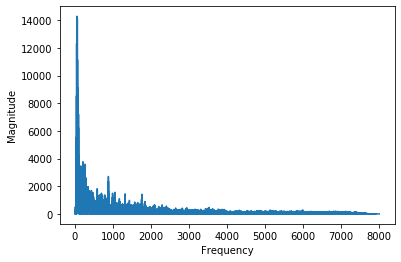

In [3]:
fft = np.fft.fft(signal)

magnitude = np.abs(fft)                          
frequency = np.linspace(0, sr, len(magnitude))

magnitude_left = magnitude[:int(len(magnitude)/2)] # FFT produces a symmetric effect
frequency_left = frequency[:int(len(frequency)/2)]

plt.plot(frequency_left, magnitude_left)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

### STFT --> SPECTROGRAPHY

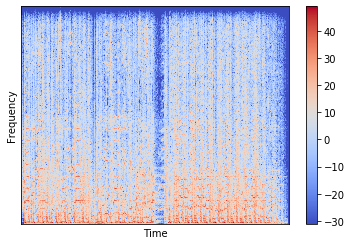

In [4]:
window = 2048
slide = 512

stft = librosa.core.stft(signal, hop_length = slide, n_fft = window)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr = sr, hop_length = slide)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()